In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df=pd.DataFrame()

In [50]:
df

""


In [51]:
np.random.seed(42)

In [52]:
X=np.random.rand(100,1)-0.5

In [53]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [54]:
y=3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [55]:
df["X"]=X.reshape(100)

In [56]:
df["y"]=y

In [57]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X VS y')

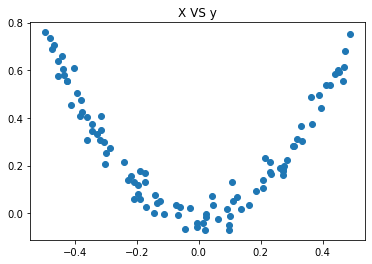

In [58]:
plt.scatter(df["X"],df["y"])
plt.title("X VS y")

In [59]:
df["pred1 [base_model]"]=df["y"].mean()

In [60]:
df.drop("pred1",axis=1,inplace=True)

KeyError: "['pred1'] not found in axis"

In [62]:
df

,X,y,pred1 [base_model]
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [63]:
df["Res1"]=df["y"]-df["pred1 [base_model]"]

In [64]:
df

,X,y,pred1 [base_model],Res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


In [65]:
#Res1 is my targeted column
#okay I got it 


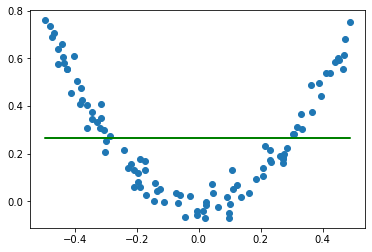

In [66]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["pred1 [base_model]"],color="green")

In [67]:
#I am going o train my first DT model on tp of residual

#X, res1


X=df["X"].values.reshape(100,1)

In [68]:
y=df["Res1"]

In [69]:
from sklearn.tree import DecisionTreeRegressor
DT1=DecisionTreeRegressor(max_leaf_nodes=8)
DT1.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [70]:
from sklearn.tree import plot_tree

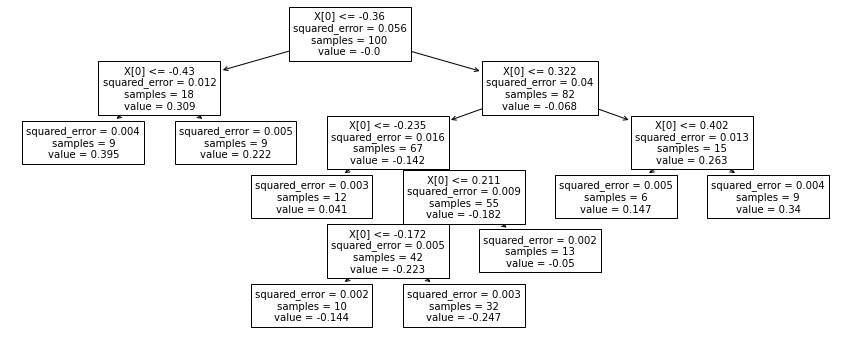

In [71]:

plt.figure(figsize=(15,6))
plot_tree(DT1)
plt.show()

In [72]:
df["pred2"]=DT1.predict(X)

In [73]:
df

,X,y,pred1 [base_model],Res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139
98,-0.474581,0.689516,0.265458,0.424057,0.395454


In [76]:
df["Res2"]=df["y"]-(df["pred1 [base_model]"]+(0.1* df["pred2"]))

In [77]:
df

,X,y,pred1 [base_model],Res1,pred2,Res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


In [78]:
X=df["X"].values.reshape(100,1)
y=df["Res2"]

In [79]:
from sklearn.tree import DecisionTreeRegressor
DT2=DecisionTreeRegressor(max_leaf_nodes=8)
DT2.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

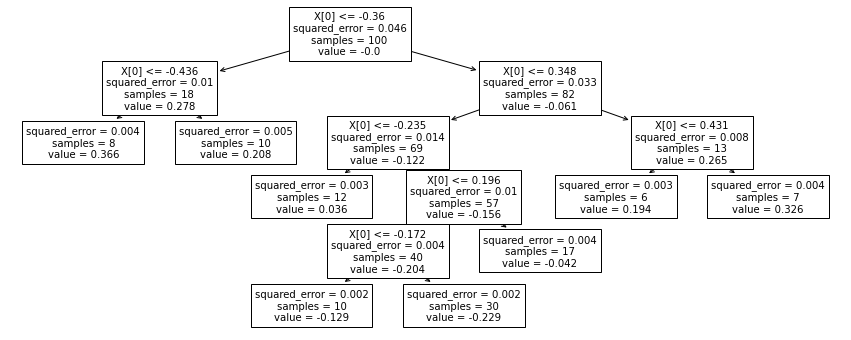

In [80]:
from sklearn.tree import plot_tree


plt.figure(figsize=(15,6))
plot_tree(DT2)
plt.show()

In [81]:
df["pred3"]=DT2.predict(X)

In [82]:
df

,X,y,pred1 [base_model],Res1,pred2,Res2,pred3
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172,-0.229393
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979,0.325552
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439,-0.041611
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922,-0.229393
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477,0.036456
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420,-0.229393
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049,-0.229393
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936,-0.229393
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512,0.365970


In [84]:
# final_pred= Base + (alpha*DT1) + (alpha*DT2)

# final_pred=df["pred1 [base_model]"] + (0.1 * DT1) + (0.1 * DT2)